In [217]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

## 1 Thresholding

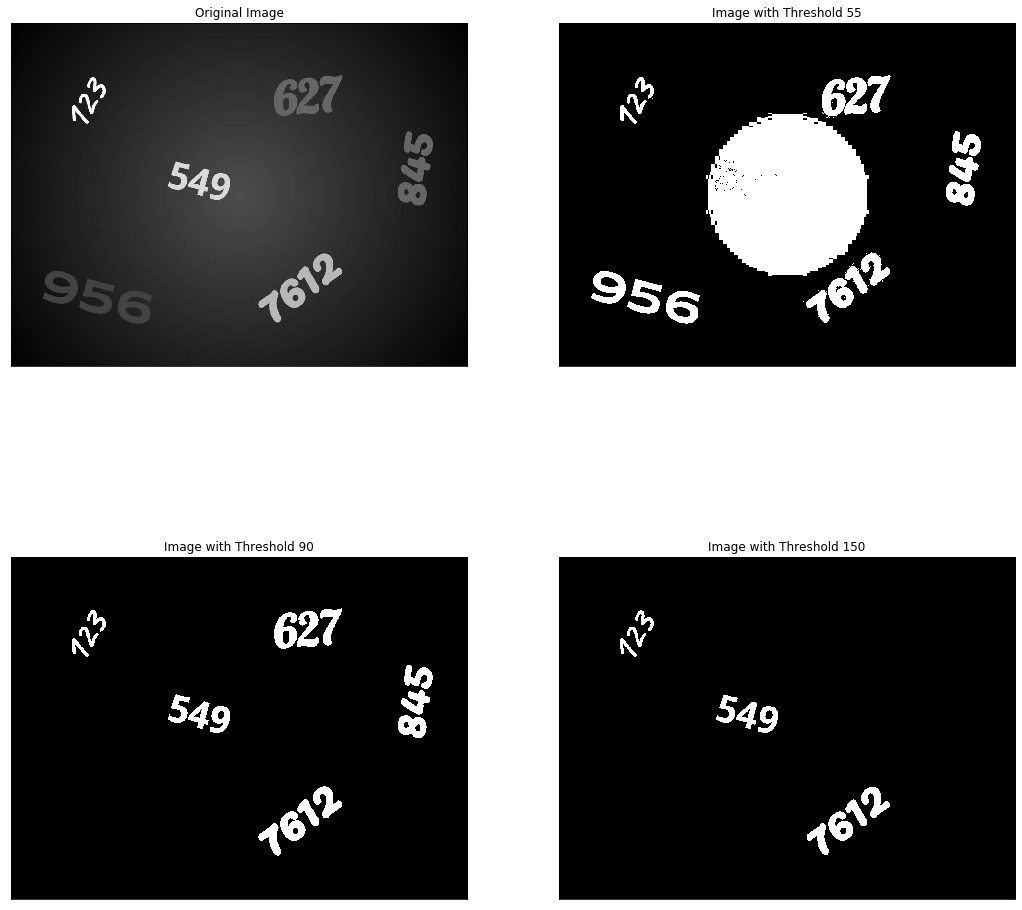

In [171]:
# PART 1.1

# Load image
image_path = "./numbers.jpg"
img = cv2.imread(image_path)

# Convert to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Set the threshold
ret, img_thresh1 = cv2.threshold(img_gray, 55, 255, cv2.THRESH_BINARY)
ret, img_thresh2 = cv2.threshold(img_gray, 90, 255, cv2.THRESH_BINARY)
ret, img_thresh3 = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY)

# Plot figures
plt.figure(figsize = (18,18))
plt.subplot(221), plt.imshow(img_gray, cmap = "gray")
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(img_thresh1, cmap = "gray")
plt.title("Image with Threshold 55"), plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(img_thresh2, cmap = "gray")
plt.title("Image with Threshold 90"), plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.imshow(img_thresh3, cmap = "gray")
plt.title("Image with Threshold 150"), plt.xticks([]), plt.yticks([])
plt.show()



Threshold = 55 we have a total of 6 numbers {123, 627, 549, 845, 956, 7612} forgrounded. Also the entire bright circle is foregrounded, that is why we cannot see number 549 with this threshold.
Threshold = 90 we have a total of 5 numbers {123, 627, 845, 549, 7612} forgrounded.
Threshold = 150 we have a total of 3 numbers {123, 549, 7612} forgrounded.


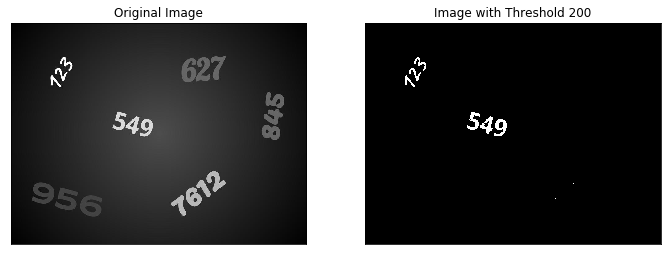

In [172]:
# PART 1.3

# Set the threshold
ret, img_thresh = cv2.threshold(img_gray, 200, 255, cv2.THRESH_BINARY)

# Plot figure
plt.figure(figsize = (18,18))
plt.subplot(131), plt.imshow(img, cmap = "gray")
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img_thresh, cmap = "gray")
plt.title("Image with Threshold 200"), plt.xticks([]), plt.yticks([])
plt.show()

## 2 Filtering (2.1 Denoising)

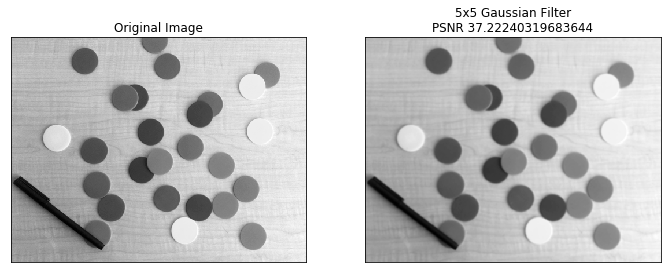

In [218]:
# PART 2.1.1

# Load image
image_path = "./Circles.png"
img = cv2.imread(image_path)

# Convert to grayscale
img_original = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
height, width = img_original.shape
gaussian = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
height, width = gaussian.shape

# Filter image using 5x5 Gaussian
img_gaussian = cv2.GaussianBlur(gaussian, (5,5), 0)

#PSNR values
psnr_gaussian = cv2.PSNR(img_original, img_gaussian)

# Plot figures
plt.figure(figsize = (18,18))
plt.subplot(131), plt.imshow(img_original, cmap = "gray")
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img_gaussian, cmap = "gray")
plt.title("5x5 Gaussian Filter\nPSNR " + str(psnr_gaussian)), plt.xticks([]), plt.yticks([])
plt.show()




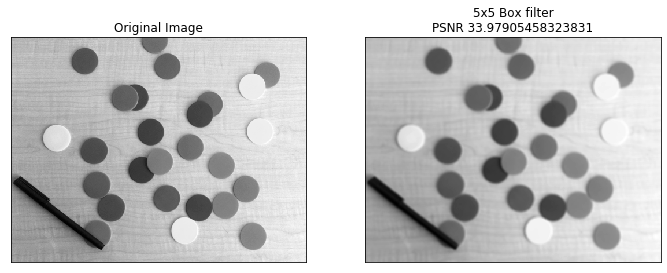

In [180]:
# PART 2.1.2

# create a box filter
kernel = np.ones((5,5), np.float32)/(5*5)

# Convert to grayscale
box = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
height, width = box.shape

# filter the image
img_box = cv2.blur(box, (5,5))

#PSNR Values
psnr_box = cv2.PSNR(img_original, img_box)

# Plot Figures
plt.figure(figsize = (18,18))
plt.subplot(131), plt.imshow(img_original, cmap = "gray")
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img_box, cmap = "gray")
plt.title("5x5 Box filter\nPSNR " + str(psnr_box)), 
plt.xticks([]), plt.yticks([])
plt.show()
 



PART 2.1.3
The value of PSNR is bigger for Gaussian filter and it provides more edges and features compared to Box filter as kernel centered pixels are more heavily weighted with gaussian filter. 

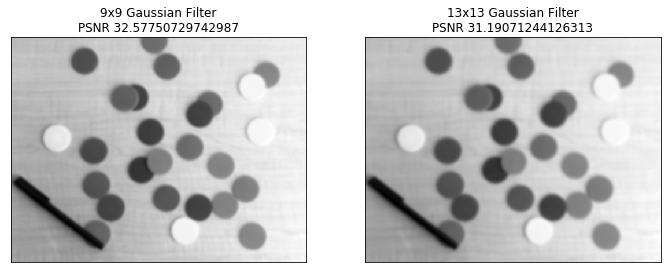

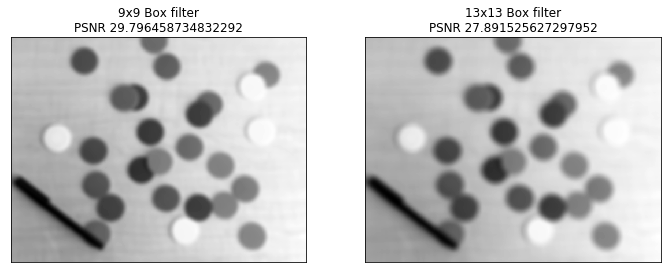

In [182]:
# PART 2.1.4

# Gaussian filter image using Gaussian
img_newgaus1 = cv2.GaussianBlur(img_gaussian, (9,9), 0)
img_newgaus2 = cv2.GaussianBlur(img_gaussian, (13,13), 0)

#PSNR values
psnr_gaussian1 = cv2.PSNR(img_original, img_newgaus1)
psnr_gaussian2 = cv2.PSNR(img_original, img_newgaus2)

# Plot figures with Gaussian filter of size 9x9 and 13x13
plt.figure(figsize = (18,18))
plt.subplot(131), plt.imshow(img_newgaus1, cmap="gray")
plt.title("9x9 Gaussian Filter\nPSNR " + str(psnr_gaussian1)), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img_newgaus2, cmap="gray")
plt.title("13x13 Gaussian Filter\nPSNR " + str(psnr_gaussian2)), plt.xticks([]), plt.yticks([])
plt.show()


# Box filter image using Box
img_newbox1 = cv2.blur(img_box, (9,9))
img_newbox2 = cv2.blur(img_box, (13,13))

#PSNR values
psnr_box1 = cv2.PSNR(img_original, img_newbox1)
psnr_box2 = cv2.PSNR(img_original, img_newbox2)

# Plot figures with Box filter of size 9x9 and 13x13
plt.figure(figsize = (18,18))
plt.subplot(131), plt.imshow(img_newbox1, cmap="gray")
plt.title("9x9 Box filter\nPSNR " + str(psnr_box1)), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img_newbox2, cmap="gray")
plt.title("13x13 Box filter\nPSNR " + str(psnr_box2)), plt.xticks([]), plt.yticks([])
plt.show()

For both filters, with a larger kernel size we get stronger blurring effects as we have a larger area over the average.

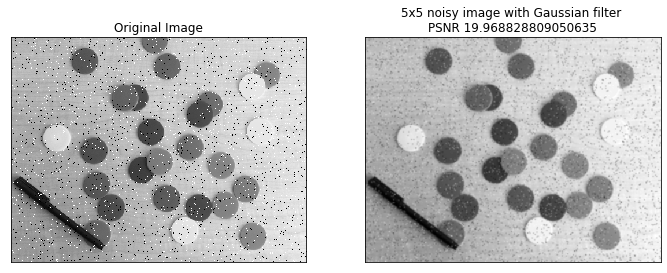

In [186]:
# PART 2.1.5

# Load image
image_path = "./Circles_sp.png"
img = cv2.imread(image_path)

# convert to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
height, width = img_gray.shape
noisy_gray1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
height, width = noisy_gray1.shape

# Filter image using 5x5 Gaussian
noisy_gaussian = cv2.GaussianBlur(noisy_gray1, (5,5), 0)

#PSNR value
psnr_gaussian = cv2.PSNR(img_gray, noisy_gaussian)

# Plot figures
plt.figure(figsize = (18,18))
plt.subplot(131), plt.imshow(img_gray, cmap="gray")
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(noisy_gaussian, cmap="gray")
plt.title("5x5 noisy image with Gaussian filter \nPSNR " + str(psnr_gaussian)),
plt.xticks([]), plt.yticks([])
plt.show()



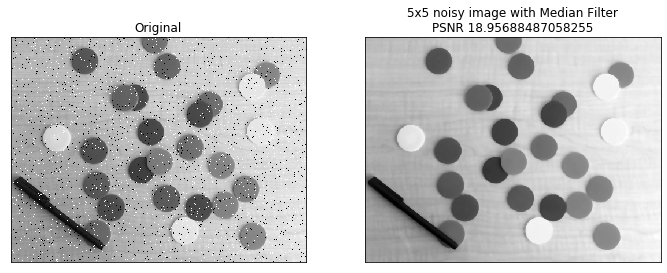

In [187]:
# PART 2.1.6

# convert to grayscale
noisy_gray2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
height, width = noisy_gray2.shape

# filter image using 5x5 median filter
noisy_median = cv2.medianBlur(noisy_gray2, 5)

#PSNR value
psnr_median = cv2.PSNR(img_gray, noisy_median)

# Plot figures
plt.figure(figsize = (18,18))
plt.subplot(131), plt.imshow(img_gray, cmap="gray")
plt.title("Original"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(noisy_median, cmap="gray")
plt.title("5x5 noisy image with Median Filter\nPSNR " + str(psnr_median)), plt.xticks([]), plt.yticks([])
plt.show()

Compare the PSNR of both of the denoised images to that of the clean image and state which method gives a better result?

Median filter gives better result.

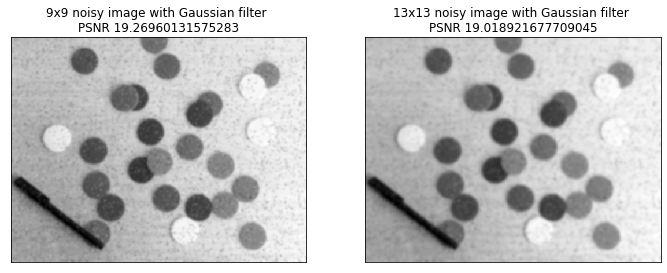

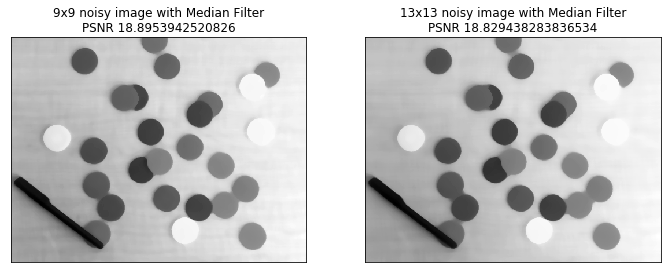

In [188]:
# PART 2.1.8

# Gaussian Filter
# Filter image using 9x9 Gaussian
noisy_gaussian1 = cv2.GaussianBlur(noisy_gray1, (9,9), 0)
# Filter image using 13x13 Gaussian
noisy_gaussian2 = cv2.GaussianBlur(noisy_gray1, (13,13), 0)

#PSNR values
psnr_gaussian1 = cv2.PSNR(img_gray, noisy_gaussian1)
psnr_gaussian2 = cv2.PSNR(img_gray, noisy_gaussian2)

# Plot figures
plt.figure(figsize = (18,18))
plt.subplot(131), plt.imshow(noisy_gaussian1, cmap="gray")
plt.title("9x9 noisy image with Gaussian filter \nPSNR " + str(psnr_gaussian1)),
plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(noisy_gaussian2, cmap="gray")
plt.title("13x13 noisy image with Gaussian filter \nPSNR " + str(psnr_gaussian2)),
plt.xticks([]), plt.yticks([])
plt.show()


#Median Filter
# filter image using 9x9 median filter
noisy_median1 = cv2.medianBlur(noisy_gray2, 9)
# filter image using 13x13 median filter
noisy_median2 = cv2.medianBlur(noisy_gray2, 13)

#PSNR values
psnr_median1 = cv2.PSNR(img_gray, noisy_median1)
psnr_median2 = cv2.PSNR(img_gray, noisy_median2)

# Plot figures
plt.figure(figsize = (18,18))
plt.subplot(131), plt.imshow(noisy_median1, cmap="gray")
plt.title("9x9 noisy image with Median Filter\nPSNR " + str(psnr_median1)),
plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(noisy_median2, cmap="gray")
plt.title("13x13 noisy image with Median Filter\nPSNR " + str(psnr_median2)),
plt.xticks([]), plt.yticks([])
plt.show()


Now, increase the size of filter to 1) 9 × 9 and 13 × 13 and repeat above mentioned filtering (Gaussian and median). What do you observe? Does PSNR increase for both filtering? Do you think visually image quality increases?

For both filters, with a larger kernel size we will get stronger blurring effects as we have a larger area over average.
Gaussian filter has more edges and features because pixels towards the kernel centre are more heavily weighed.
For both filters, increasing the size of filter from 5 to 13 should decrease PSNR value.
Visually, the image quality decreases.

## 2 Filtering (2.2 Sharpening)

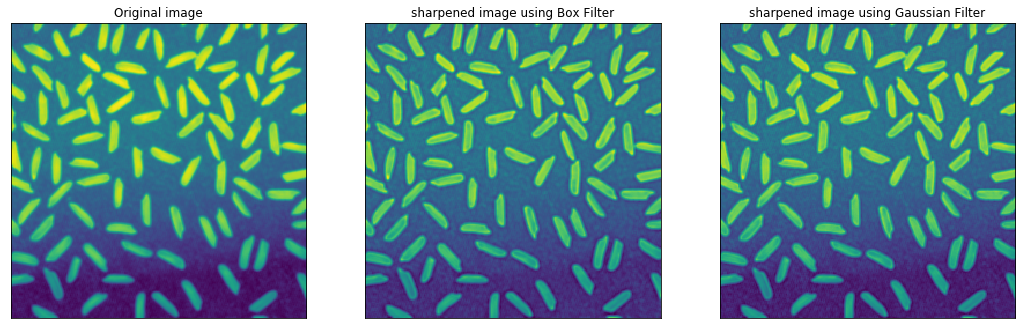

In [189]:
# PART 2.2.1

# image filtering
image_path = "./rice.png"
img = cv2.imread(image_path)

# convert to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
height, width = img_gray.shape

# filter image using cv2.blur()
box_sharp = cv2.blur(img_gray, (7,7))

# filter image using cv2.GaussianBlur
gaussian_sharp = cv2.GaussianBlur(img_gray, (7,7), 0)

# Defining new variables
box_detail = img_gray - box_sharp
box_img_sharp = box_detail + img_gray

gaus_detail = img_gray - gaussian_sharp
gaus_img_sharp = gaus_detail + img_gray

# plot
plt.figure(figsize = (18,18))
plt.subplot(131), plt.imshow(img_gray)
plt.title("Original image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(box_img_sharp)
plt.title("sharpened image using Box Filter"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(gaus_img_sharp)
plt.title("sharpened image using Gaussian Filter"), plt.xticks([]), plt.yticks([])
plt.show()


Which of the two methods is expected to give better results and why? Can you observe expected result? 
Box filter gives better result than the gaussian filter. Because with gaussian filter we get more blurry image and sharpened image with gaussian filter removes more detailes compare to box filter.

## 3 Edge detection (3.1 Sobel edge detector)

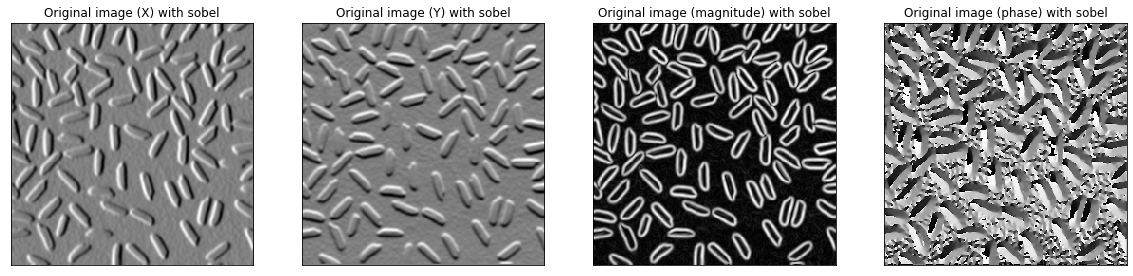

In [190]:
#PART 3.1.1a

# store image path
img_path = "./rice.png"

# load the image as grayscale
img_rice = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# apply 5x5 Sobel filter 
I_x_rice = cv2.Sobel(img_rice, cv2.CV_64F, 1, 0, ksize=5)
I_y_rice = cv2.Sobel(img_rice, cv2.CV_64F, 0, 1, ksize=5)
I_m_rice = cv2.magnitude(I_x_rice, I_y_rice)
I_p_rice = cv2.phase(I_x_rice, I_y_rice)

# display images
plt.figure(figsize=(20, 20))
plt.subplot(141), plt.imshow(I_x_rice, cmap="gray")
plt.title("Original image (X) with sobel"),
plt.xticks([]), plt.yticks([])
plt.subplot(142), plt.imshow(I_y_rice, cmap="gray")
plt.title("Original image (Y) with sobel"),
plt.xticks([]), plt.yticks([])
plt.subplot(143), plt.imshow(I_m_rice, cmap="gray")
plt.title("Original image (magnitude) with sobel"),
plt.xticks([]), plt.yticks([])
plt.subplot(144), plt.imshow(I_p_rice, cmap="gray")
plt.title("Original image (phase) with sobel"),
plt.xticks([]), plt.yticks([])
plt.show()




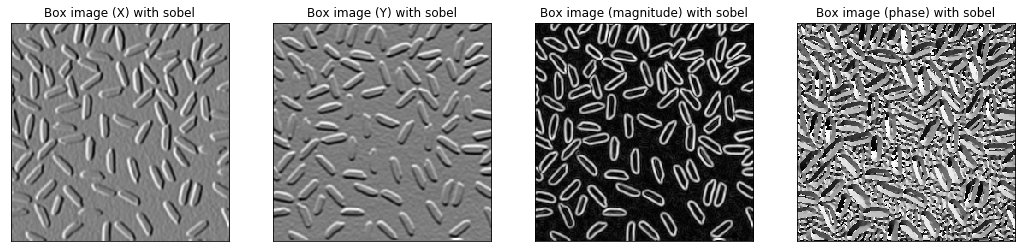

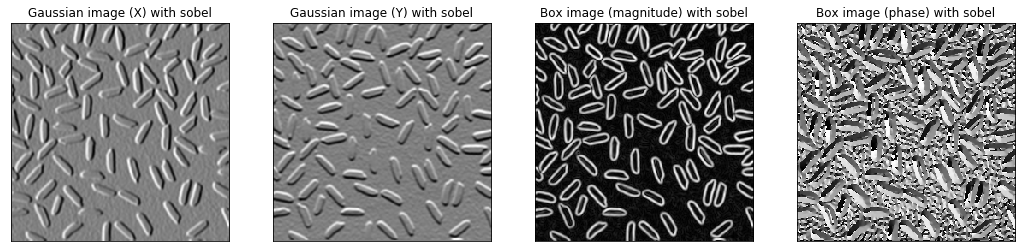

In [192]:
# PART 3.1.1b

# apply 5x5 Sobel filter to box filter
I_x_box = cv2.Sobel(box_img_sharp, cv2.CV_64F, 1, 0, ksize=5)
I_y_box = cv2.Sobel(box_img_sharp, cv2.CV_64F, 0, 1, ksize=5)
I_m_box = cv2.magnitude(I_x_box, I_y_box)
I_p_box = cv2.phase(I_x_box, I_y_box)

# apply 5x5 Sobel filter to gaussian filter
I_x_gaus = cv2.Sobel(gaus_img_sharp, cv2.CV_64F, 1, 0, ksize=5)
I_y_gaus = cv2.Sobel(gaus_img_sharp, cv2.CV_64F, 0, 1, ksize=5)
I_m_gaus = cv2.magnitude(I_x_gaus, I_y_gaus)
I_p_gaus = cv2.phase(I_x_gaus, I_y_gaus)

# display images
plt.figure(figsize=(18, 18))
plt.subplot(241), plt.imshow(I_x_box, cmap="gray")
plt.title("Box image (X) with sobel"),
plt.xticks([]), plt.yticks([])
plt.subplot(242), plt.imshow(I_y_box, cmap="gray")
plt.title("Box image (Y) with sobel"),
plt.xticks([]), plt.yticks([])
plt.subplot(243), plt.imshow(I_m_box, cmap="gray")
plt.title("Box image (magnitude) with sobel"),
plt.xticks([]), plt.yticks([])
plt.subplot(244), plt.imshow(I_p_box, cmap="gray")
plt.title("Box image (phase) with sobel"),
plt.xticks([]), plt.yticks([])
plt.figure(figsize=(18, 18))
plt.subplot(245), plt.imshow(I_x_gaus, cmap="gray")
plt.title("Gaussian image (X) with sobel"),
plt.xticks([]), plt.yticks([])
plt.subplot(246), plt.imshow(I_y_gaus, cmap="gray")
plt.title("Gaussian image (Y) with sobel"),
plt.xticks([]), plt.yticks([])
plt.subplot(247), plt.imshow(I_m_gaus, cmap="gray")
plt.title("Box image (magnitude) with sobel"),
plt.xticks([]), plt.yticks([])
plt.subplot(248), plt.imshow(I_p_gaus, cmap="gray")
plt.title("Box image (phase) with sobel"),
plt.xticks([]), plt.yticks([])
plt.show()



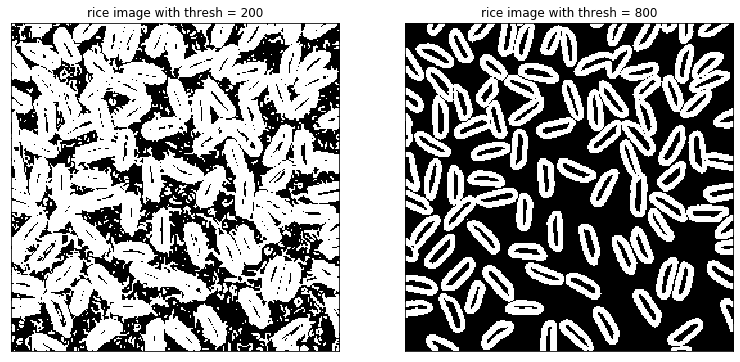

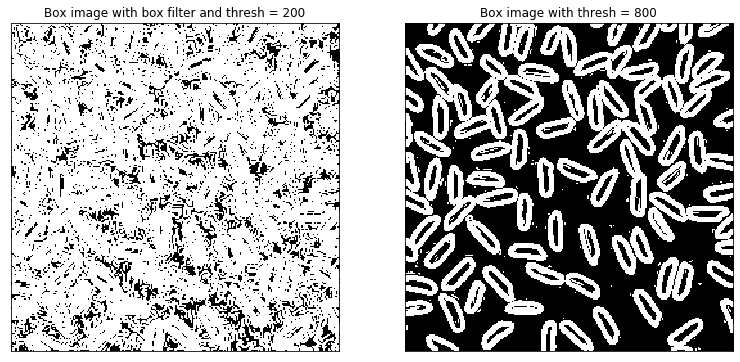

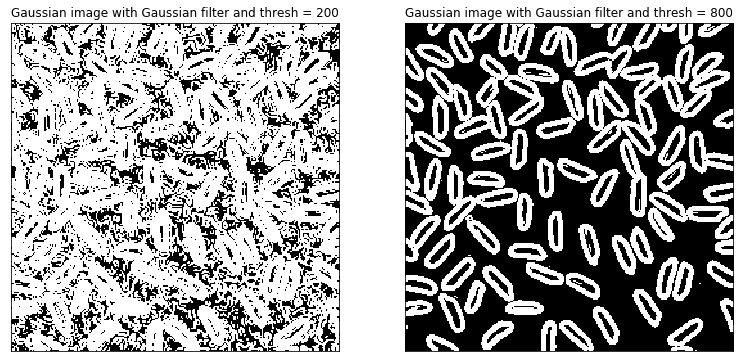

In [198]:
# PART 3.1.1c

#Rice Image
# Apply 5x5 Sobel filters to the intensity channel
I_x_rice = cv2.Sobel(img_rice, cv2.CV_64F, 1, 0, ksize=5)
I_y_rice = cv2.Sobel(img_rice, cv2.CV_64F, 0, 1, ksize=5)

# Compute sobel Magnitude
I_m_rice = cv2.magnitude(I_x_rice, I_y_rice)

# Apply thresholing
ret, rice_thresh1 = cv2.threshold(I_m_rice, 200, 255, cv2.THRESH_BINARY)
ret, rice_thresh2 = cv2.threshold(I_m_rice, 800, 255, cv2.THRESH_BINARY)

#Display images
plt.figure(figsize=(20, 20))
plt.subplot(131), plt.imshow(rice_thresh1, cmap="gray")
plt.title("rice image with thresh = 200"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(rice_thresh2, cmap="gray")
plt.title("rice image with thresh = 800"), plt.xticks([]), plt.yticks([])
plt.show()



#Box sharpened/sobel image
# Apply 5x5 Sobel filters to the intensity channel
I_x_box1 = cv2.Sobel(box_img_sharp, cv2.CV_64F, 1, 0, ksize=5)
I_y_box1 = cv2.Sobel(box_img_sharp, cv2.CV_64F, 0, 1, ksize=5)

# Compute sobel Magnitude
I_m_box1 = cv2.magnitude(I_x_box1, I_y_box1)

# Apply thresholing
ret, box1_thresh1 = cv2.threshold(I_m_box1, 200, 255, cv2.THRESH_BINARY)
ret, box1_thresh2 = cv2.threshold(I_m_box1, 800, 255, cv2.THRESH_BINARY)

#Display images
plt.figure(figsize=(20, 20))
plt.subplot(131), plt.imshow(box1_thresh1, cmap="gray")
plt.title("Box image with box filter and thresh = 200"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(box1_thresh2, cmap="gray")
plt.title("Box image with thresh = 800"), plt.xticks([]), plt.yticks([])
plt.show()



#Gaussian sharpened/sobel image
# Apply 5x5 Sobel filters to the intensity channel
I_x_gaussian1 = cv2.Sobel(gaus_img_sharp, cv2.CV_64F, 1, 0, ksize=5)
I_y_gaussian1 = cv2.Sobel(gaus_img_sharp, cv2.CV_64F, 0, 1, ksize=5)

# Compute sobel Magnitude
I_m_gaussian1 = cv2.magnitude(I_x_gaussian1, I_y_gaussian1)

# Apply thresholing
ret, gaussian1_thresh1 = cv2.threshold(I_m_gaussian1, 200, 255, cv2.THRESH_BINARY)
ret, gaussian1_thresh2 = cv2.threshold(I_m_gaussian1, 800, 255, cv2.THRESH_BINARY)

#Display image
plt.figure(figsize=(20, 20))
plt.subplot(131), plt.imshow(gaussian1_thresh1, cmap="gray")
plt.title("Gaussian image with Gaussian filter and thresh = 200"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(gaussian1_thresh2, cmap="gray")
plt.title("Gaussian image with Gaussian filter and thresh = 800"), plt.xticks([]), plt.yticks([])
plt.show()




Comment on the effectiveness of using sharpening prior to the edge detection:

With a constant threshold, sharpening intensifies differences; therefore, it causes more pixels to be identified as edges.

Comment on the effect of the different threshold values:

Higher threshold exclude areas with less severe changes; therefore, less area is considered as edges and the storngest edges are easily distinguished.


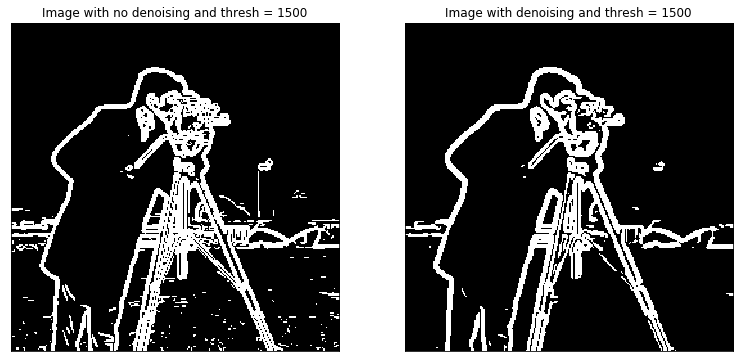

In [204]:
#PART 3.1.2
img_path1 = "./cameraman.jpg"

# load the image as grayscale
img = cv2.imread(img_path1, cv2.IMREAD_GRAYSCALE)

# apply 5x5 Sobel filters to the intensity channel
I_x_man = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
I_y_man = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)
I_m_man = cv2.magnitude(I_x_man, I_y_man)

# Apply thresholding
ret, img_thresh = cv2.threshold(I_m_man, 1500, 255, cv2.THRESH_BINARY)

# Denoising image
denoised_img = cv2.GaussianBlur(img, (5,5), 0)

# apply 5x5 Sobel filters to the intensity channel
I_x_filtered = cv2.Sobel(denoised_img, cv2.CV_64F, 1, 0, ksize=5)
I_y_filtered = cv2.Sobel(denoised_img, cv2.CV_64F, 0, 1, ksize=5)
I_m_filtered = cv2.magnitude(I_x_filtered, I_y_filtered)

# Applying thresholding
ret, denoised_img_thresh = cv2.threshold(I_m_filtered, 1500, 255, cv2.THRESH_BINARY)

# display images
plt.figure(figsize=(20, 20))
plt.subplot(131), plt.imshow(img_thresh, cmap="gray")
plt.title("Image with no denoising and thresh = 1500"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(denoised_img_thresh, cmap="gray")
plt.title("Image with denoising and thresh = 1500"), plt.xticks([]), plt.yticks([])
plt.show()





Comment on th effectiveness of using denoising prior to edge detection:

Denoising removes extra noise. Therefore, we have more clear outlines when edge detector is applied. It also removes some details for the  pixels that are below the kernel size.

## 3 Edge Detector (3.2 Laplacian of Gaussian)

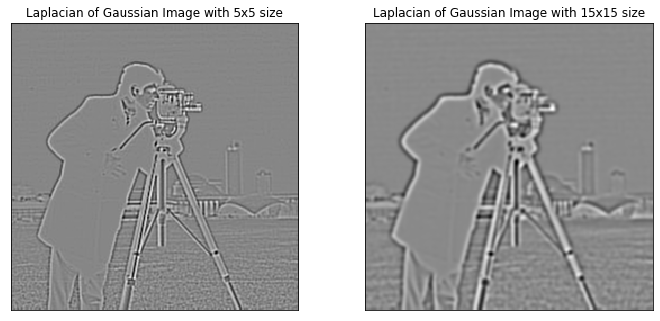

In [205]:
img_path = "./cameraman.jpg"

# load the image as grayscale
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# apply Laplacian filters to the intensity channel
I_lap1 = cv2.Laplacian(img, cv2.CV_32F, ksize=5)
I_lap2 = cv2.Laplacian(img, cv2.CV_32F, ksize=15)

# display images
plt.figure(figsize=(18, 18))
plt.subplot(331), plt.imshow(I_lap1, cmap="gray")
plt.title("Laplacian of Gaussian Image with 5x5 size"), plt.xticks([]), plt.yticks([])
plt.subplot(332), plt.imshow(I_lap2, cmap="gray")
plt.title("Laplacian of Gaussian Image with 15x15 size"), plt.xticks([]), plt.yticks([])
plt.show()



The edges are less localized (thicker and softer) and we have a more blurry image with higher kernel size. Artifacts (in flat areas) are more observable.

## 3.3 Canny Edge Detection


Four main steps of canny edge detector:

1. Filter image with x, y derivatives of Gaussian
2. Find magnitude and orientation of gradient
3. Non‐maximum suppression:
    
    • Thin multi‐pixel wide “ridges” down to single pixel width
4. Thresholding and linking (hysteresis):
   
   • Define two thresholds: low and high
   
   • Use the high threshold to start edge curves and the low threshold to continue them    

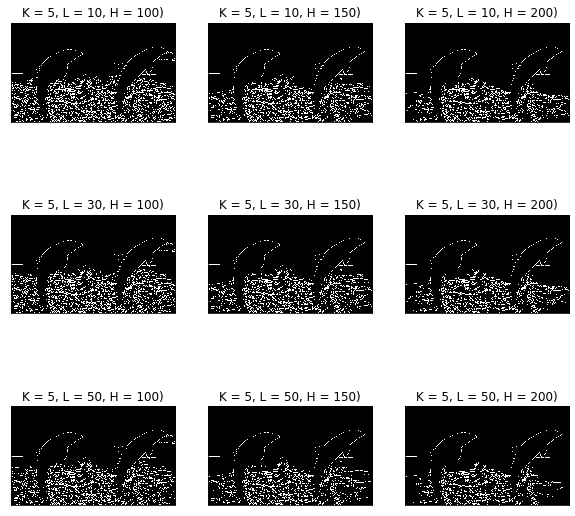

In [206]:
img_path = "./dolphin.jpg"
# K = 5
# L = {10, 30, 50}
# H = {100, 150, 200}

# load image as gray-scaled
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# blur image before-hand
img1 = cv2.GaussianBlur(img, (5, 5), 0)

# compute Canny edges
I_edge1 = cv2.Canny(img1, 10, 100)
I_edge2 = cv2.Canny(img1, 10, 150)
I_edge3 = cv2.Canny(img1, 10, 200)
I_edge4 = cv2.Canny(img1, 30, 100)
I_edge5 = cv2.Canny(img1, 30, 150)
I_edge6 = cv2.Canny(img1, 30, 200)
I_edge7 = cv2.Canny(img1, 50, 100)
I_edge8 = cv2.Canny(img1, 50, 150)
I_edge9 = cv2.Canny(img1, 50, 200)

# display images
plt.figure(figsize=(10, 10))
plt.subplot(331), plt.imshow(I_edge1, cmap="gray")
plt.title("K = 5, L = 10, H = 100)"), plt.xticks([]), plt.yticks([])
plt.subplot(332), plt.imshow(I_edge2, cmap="gray")
plt.title("K = 5, L = 10, H = 150)"), plt.xticks([]), plt.yticks([])
plt.subplot(333), plt.imshow(I_edge3, cmap="gray")
plt.title("K = 5, L = 10, H = 200)"), plt.xticks([]), plt.yticks([])
plt.subplot(334), plt.imshow(I_edge4, cmap="gray")
plt.title("K = 5, L = 30, H = 100)"), plt.xticks([]), plt.yticks([])
plt.subplot(335), plt.imshow(I_edge5, cmap="gray")
plt.title("K = 5, L = 30, H = 150)"), plt.xticks([]), plt.yticks([])
plt.subplot(336), plt.imshow(I_edge6, cmap="gray")
plt.title("K = 5, L = 30, H = 200)"), plt.xticks([]), plt.yticks([])
plt.subplot(337), plt.imshow(I_edge7, cmap="gray")
plt.title("K = 5, L = 50, H = 100)"), plt.xticks([]), plt.yticks([])
plt.subplot(338), plt.imshow(I_edge8, cmap="gray")
plt.title("K = 5, L = 50, H = 150)"), plt.xticks([]), plt.yticks([])
plt.subplot(339), plt.imshow(I_edge9, cmap="gray")
plt.title("K = 5, L = 50, H = 200)"), plt.xticks([]), plt.yticks([])
plt.show()



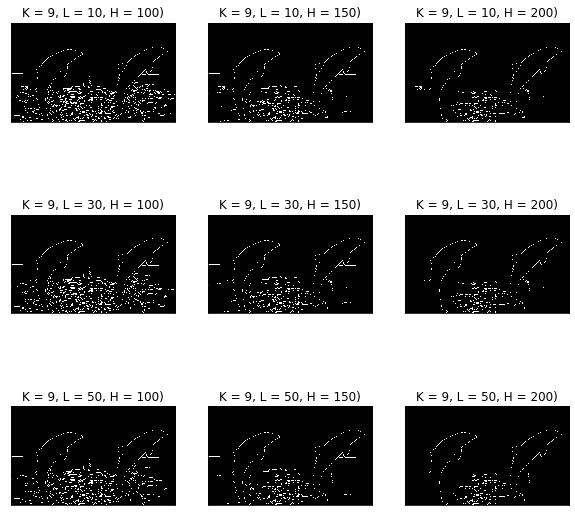

In [207]:
# K = 9
# L = {10, 30, 50}
# H = {100, 150, 200}

# blur image before-hand
img2 = cv2.GaussianBlur(img, (9, 9), 0)

# compute Canny edges
I_edge1 = cv2.Canny(img2, 10, 100)
I_edge2 = cv2.Canny(img2, 10, 150)
I_edge3 = cv2.Canny(img2, 10, 200)
I_edge4 = cv2.Canny(img2, 30, 100)
I_edge5 = cv2.Canny(img2, 30, 150)
I_edge6 = cv2.Canny(img2, 30, 200)
I_edge7 = cv2.Canny(img2, 50, 100)
I_edge8 = cv2.Canny(img2, 50, 150)
I_edge9 = cv2.Canny(img2, 50, 200)


# display images
plt.figure(figsize=(10, 10))
plt.subplot(331), plt.imshow(I_edge1, cmap="gray")
plt.title("K = 9, L = 10, H = 100)"), plt.xticks([]), plt.yticks([])
plt.subplot(332), plt.imshow(I_edge2, cmap="gray")
plt.title("K = 9, L = 10, H = 150)"), plt.xticks([]), plt.yticks([])
plt.subplot(333), plt.imshow(I_edge3, cmap="gray")
plt.title("K = 9, L = 10, H = 200)"), plt.xticks([]), plt.yticks([])
plt.subplot(334), plt.imshow(I_edge4, cmap="gray")
plt.title("K = 9, L = 30, H = 100)"), plt.xticks([]), plt.yticks([])
plt.subplot(335), plt.imshow(I_edge5, cmap="gray")
plt.title("K = 9, L = 30, H = 150)"), plt.xticks([]), plt.yticks([])
plt.subplot(336), plt.imshow(I_edge6, cmap="gray")
plt.title("K = 9, L = 30, H = 200)"), plt.xticks([]), plt.yticks([])
plt.subplot(337), plt.imshow(I_edge7, cmap="gray")
plt.title("K = 9, L = 50, H = 100)"), plt.xticks([]), plt.yticks([])
plt.subplot(338), plt.imshow(I_edge8, cmap="gray")
plt.title("K = 9, L = 50, H = 150)"), plt.xticks([]), plt.yticks([])
plt.subplot(339), plt.imshow(I_edge9, cmap="gray")
plt.title("K = 9, L = 50, H = 200)"), plt.xticks([]), plt.yticks([])
plt.show()

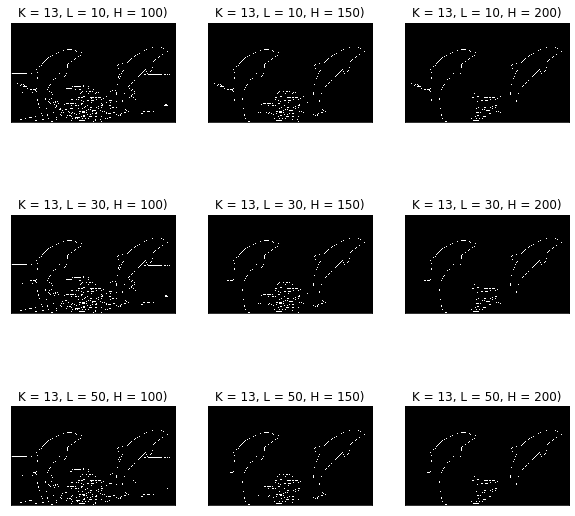

In [208]:
# K =  13
# L = {10, 30, 50}
# H = {100, 150, 200}

# blur image before-hand
img3 = cv2.GaussianBlur(img, (13, 13), 0)

# compute Canny edges
I_edge1 = cv2.Canny(img3, 10, 100)
I_edge2 = cv2.Canny(img3, 10, 150)
I_edge3 = cv2.Canny(img3, 10, 200)
I_edge4 = cv2.Canny(img3, 30, 100)
I_edge5 = cv2.Canny(img3, 30, 150)
I_edge6 = cv2.Canny(img3, 30, 200)
I_edge7 = cv2.Canny(img3, 50, 100)
I_edge8 = cv2.Canny(img3, 50, 150)
I_edge9 = cv2.Canny(img3, 50, 200)

# display images
plt.figure(figsize=(10, 10))
plt.subplot(331), plt.imshow(I_edge1, cmap="gray")
plt.title("K = 13, L = 10, H = 100)"), plt.xticks([]), plt.yticks([])
plt.subplot(332), plt.imshow(I_edge2, cmap="gray")
plt.title("K = 13, L = 10, H = 150)"), plt.xticks([]), plt.yticks([])
plt.subplot(333), plt.imshow(I_edge3, cmap="gray")
plt.title("K = 13, L = 10, H = 200)"), plt.xticks([]), plt.yticks([])
plt.subplot(334), plt.imshow(I_edge4, cmap="gray")
plt.title("K = 13, L = 30, H = 100)"), plt.xticks([]), plt.yticks([])
plt.subplot(335), plt.imshow(I_edge5, cmap="gray")
plt.title("K = 13, L = 30, H = 150)"), plt.xticks([]), plt.yticks([])
plt.subplot(336), plt.imshow(I_edge6, cmap="gray")
plt.title("K = 13, L = 30, H = 200)"), plt.xticks([]), plt.yticks([])
plt.subplot(337), plt.imshow(I_edge7, cmap="gray")
plt.title("K = 13, L = 50, H = 100)"), plt.xticks([]), plt.yticks([])
plt.subplot(338), plt.imshow(I_edge8, cmap="gray")
plt.title("K = 13, L = 50, H = 150)"), plt.xticks([]), plt.yticks([])
plt.subplot(339), plt.imshow(I_edge9, cmap="gray")
plt.title("K = 13, L = 50, H = 200)"), plt.xticks([]), plt.yticks([])
plt.show()

By increasing the values of hyper-parameters the total amount of edges of the image will decrease. Also, by keeping the value of Kernel size (K) constant and increasing L and H, there will be less edges displyed. 

K: Larger Gaussian Kernel implies more blurred image and therefore, less detected edges. The effect of K is very obvious in regions with high frequencies.

L and U: Higher thresholds reduces the total number of edges as only areas with stronger changes are considered for edges.
L has more indirect impact because there are less connection to do after  getting the primary edge map from H.


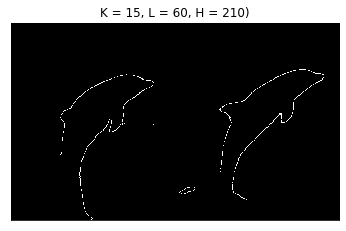

In [214]:
# blur image before-hand
img4 = cv2.GaussianBlur(img, (15, 15), 0)

# compute Canny edges
I_edge = cv2.Canny(img4, 60, 210)

# display images
plt.figure(figsize=(20, 20))
plt.subplot(131), plt.imshow(I_edge, cmap="gray")
plt.title("K = 15, L = 60, H = 210)"), plt.xticks([]), plt.yticks([])
plt.show()